In [1]:
# importing libaries
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import cv2
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.applications.vgg16 import VGG16

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# 1. Load Dataset

The dataset was adapted from [Kaggle](https://www.kaggle.com/sungtheillest/vehicledetected-stanford-cars-data-classes-folder), by combining 50% of the testing set to the training set to increase the number of training samples. The original 196 classes representing each vehicle's make and model were reduced to 49 classes representing only vehicle's make.





In [3]:
# Parameters for Data Augmentation and Scaling
gen_params = {"rescale":1.0/255,
              "featurewise_center":False,
              "samplewise_center":False,
              "featurewise_std_normalization":False,
              "samplewise_std_normalization":False,
              "zca_whitening":False,
              "rotation_range":20,
              "width_shift_range":0.1,
              "height_shift_range":0.1,
              "shear_range":0.2,
              "zoom_range":0.1,
              "horizontal_flip":True,
              "fill_mode":'constant',
              "cval": 0,
              "validation_split":0.25}

#Prepare ImageDataGenerators
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**gen_params)              
test_params = {"rescale":1.0/255,}
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**test_params)


## Data generator for training images
train_generator = train_datagen.flow_from_directory('/content/gdrive/MyDrive/Kaggle/data/car_data/train/',
                                                    class_mode='categorical', batch_size = 32,
                                                    target_size=(224,224),color_mode='rgb',shuffle = True,subset='training')

## Data generator for validation images
val_generator = train_datagen.flow_from_directory('/content/gdrive/MyDrive/Kaggle/data/car_data/train/',
                                                    class_mode='categorical', batch_size = 32, 
                                                    target_size=(224,224),color_mode='rgb',shuffle = True,subset='validation')
## Data generator for test images

test_generator = test_datagen.flow_from_directory('/content/gdrive/MyDrive/Kaggle/data/car_data/test/',
                                                    class_mode='categorical', batch_size = 32,
                                                    target_size=(224,224),color_mode='rgb',shuffle = True)

Found 9138 images belonging to 49 classes.
Found 3021 images belonging to 49 classes.
Found 4026 images belonging to 49 classes.


# 2. Dataset Exploration

## 2.1. Dataset Information

In [84]:
list_data = [train_generator.samples,
             val_generator.samples,
             test_generator.samples,
             train_generator.samples+val_generator.samples+test_generator.samples,
             train_generator.image_shape,
             len(np.unique(train_generator.classes))]

df = pd.DataFrame([list_data],
                  columns=['Number of training images','Number of validation images','Number of testing images','Total number of images','Size of each image','Number of Classes'],
                  index=['Value']).transpose()

display(df)

,Value
Number of training images,9138
Number of validation images,3021
Number of testing images,4026
Total number of images,16185
Size of each image,"(224, 224, 3)"
Number of Classes,49


## 2.2. Class Distribution

In [112]:
from collections import Counter
train = Counter(train_generator.classes)
val = Counter(val_generator.classes)
test = Counter(test_generator.classes)
total = dict(train+val+test)
class_names = dict(train_generator.class_indices)
class_names = {v: k for k, v in class_names.items()}

In [129]:
class_df = pd.DataFrame([class_names,total]).transpose()
class_df.columns=['Make','Num Images']
class_df

,Make,Num Images
0,AM General,89
1,Acura,482
2,Aston Martin,314
3,Audi,1169
4,BMW,1055
5,Bentley,472
6,Bugatti,152
7,Buick,314
8,Cadillac,257
9,Chevrolet,1799


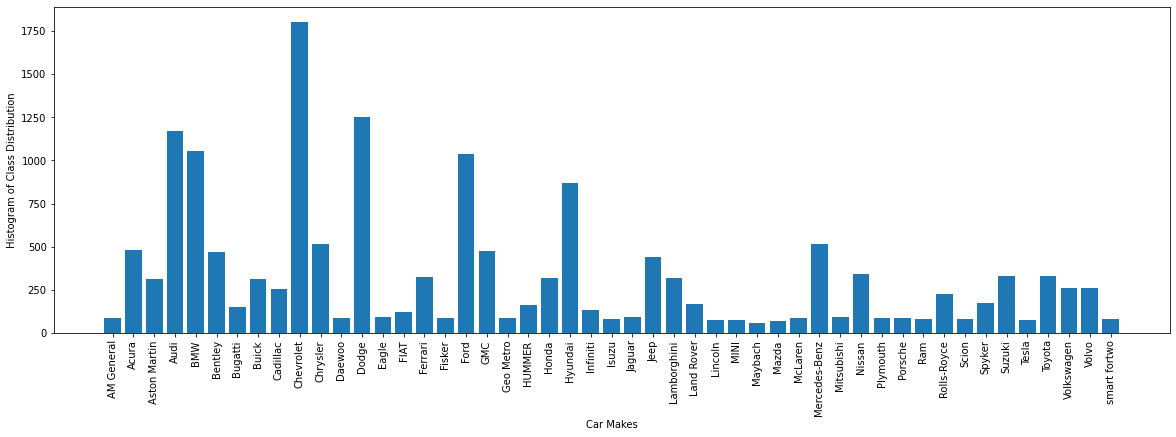

In [163]:
fig = plt.figure()
fig.set_size_inches(20,6)
plt.bar(class_df['Make'],class_df['Num Images'])
plt.xticks(rotation=90)
plt.xlabel("Car Makes")
plt.ylabel("Number of Images")
plt.ylabel("Histogram of Class Distribution")
plt.show()

## 2.3. Data Visualization

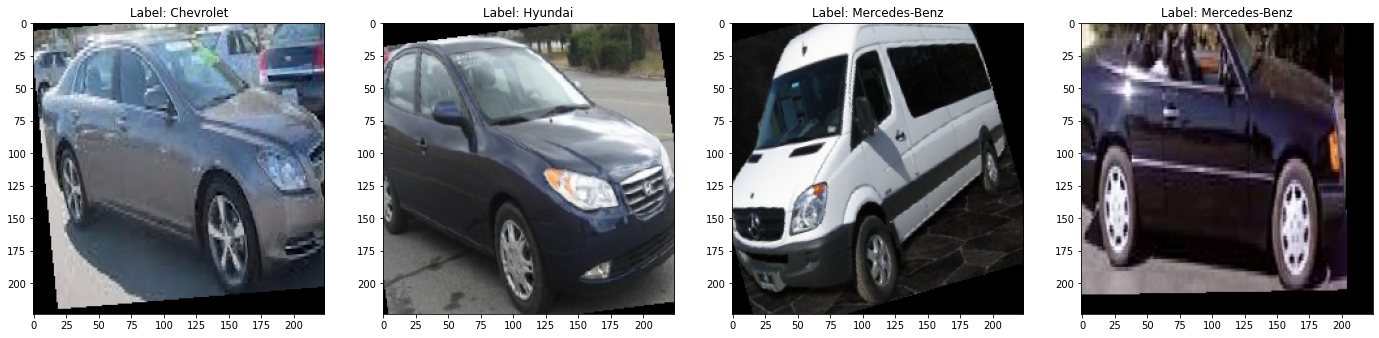

In [169]:
# Displaying some images from training set
plt.figure(figsize = (24,18))
Xbatch,Ybatch = train_generator.__getitem__(0)
for ii in range(4):
    plt.subplot(1,4,ii+1)
    plt.imshow((Xbatch[ii]- Xbatch[ii].min())/(Xbatch.max() - Xbatch[ii].min()), cmap = "gray")
    plt.title("Label: %s" %class_names[int(Ybatch[ii].argmax())])
plt.show()